<a href="https://colab.research.google.com/github/mesbah5959/Data695/blob/main/Final_Project_695.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
# from google.colab import files
# uploaded = files.upload()
# file_path = '/content/drive/MyDrive/MyFiles/your_file.csv'

In [4]:
url1 = 'https://media.githubusercontent.com/media/mesbah5959/Data695/main/cms_hospital_patient_satisfaction_2016.csv'
url2 = 'https://media.githubusercontent.com/media/mesbah5959/Data695/main/cms_hospital_patient_satisfaction_2017.csv'
url3 = 'https://media.githubusercontent.com/media/mesbah5959/Data695/main/cms_hospital_patient_satisfaction_2018.csv'
url4 = 'https://media.githubusercontent.com/media/mesbah5959/Data695/main/cms_hospital_patient_satisfaction_2019.csv'
url5 = 'https://media.githubusercontent.com/media/mesbah5959/Data695/main/cms_hospital_patient_satisfaction_2020.csv'

In [22]:
file1 = pd.read_csv(url1)
file2 = pd.read_csv(url2)
file3 = pd.read_csv(url3)
file4 = pd.read_csv(url4)
file5 = pd.read_csv(url5)

In [6]:
df = pd.concat([file1, file2, file3, file4, file5], ignore_index=True)

In [7]:
df.to_csv('data.csv', index=False)

In [8]:
df

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_STAR_RATING,Summary star rating,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_A_P,Patients who reported that their room and bath...,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_SN_P,Patients who reported that their room and bath...,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_U_P,Patients who reported that their room and bath...,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_LINEAR_SCORE,Cleanliness - linear mean score,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653678,670130,SOUTHCROSS HOSPITAL,4243 EAST SOUTHCROSS BLVD SUITE 100,SAN ANTONIO,TX,78222,BEXAR,(210) 507-4392,H_RECMND_DY,"Patients who reported YES, they would definite...",...,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0
1653679,670130,SOUTHCROSS HOSPITAL,4243 EAST SOUTHCROSS BLVD SUITE 100,SAN ANTONIO,TX,78222,BEXAR,(210) 507-4392,H_RECMND_PY,"Patients who reported YES, they would probably...",...,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0
1653680,670130,SOUTHCROSS HOSPITAL,4243 EAST SOUTHCROSS BLVD SUITE 100,SAN ANTONIO,TX,78222,BEXAR,(210) 507-4392,H_RECMND_LINEAR_SCORE,Recommend hospital - linear mean score,...,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0
1653681,670130,SOUTHCROSS HOSPITAL,4243 EAST SOUTHCROSS BLVD SUITE 100,SAN ANTONIO,TX,78222,BEXAR,(210) 507-4392,H_RECMND_STAR_RATING,Recommend hospital - star rating,...,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0,Not Available,19.0


In [9]:
# Replacing 'Not Available' and 'Not Applicable' with 'Na'
df.replace(['Not Available', 'Not Applicable'], 'Na', inplace=True)

In [10]:
# df.rename(columns={'County Name': 'Country Name'}, inplace=True)
# County is correct, it's not Country!
# In the United States, a county is neither a city nor a state. Counties are a level of local government between the state and city levels.
# Each state is divided into counties, which often contain several cities or towns, and provide certain local government services.

In [11]:
# Number of Rows and Columns
num_rows, num_columns = df.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Rows: 1653683
Number of Columns: 43


In [13]:
# Selecting the desired columns from the raw dataset:
selected_columns = [
    'Year',
    'Start Date',
    'End Date',
    'City',
    'State',
    'County Name',
    'ZIP Code',
    'Hospital Type',
    'Hospital Ownership',
    'Hospital overall rating',
    'Emergency Services',
    'Number of Completed Surveys',
    'Survey Response Rate Percent',
    'Patient Survey Star Rating',
    'HCAHPS Answer Percent',
    'Patient experience national comparison'
]

# New DataFrame with the selected columns
data = df[selected_columns]


In [14]:
data

,Year,Start Date,End Date,City,State,County Name,ZIP Code,Hospital Type,Hospital Ownership,Hospital overall rating,Emergency Services,Number of Completed Surveys,Survey Response Rate Percent,Patient Survey Star Rating,HCAHPS Answer Percent,Patient experience national comparison
0,2016,04/01/2015,03/31/2016,DOTHAN,AL,HOUSTON,36301,Acute Care Hospitals,Government - Hospital District or Authority,3,Yes,1213,27,3,Na,Below the National average
1,2016,04/01/2015,03/31/2016,DOTHAN,AL,HOUSTON,36301,Acute Care Hospitals,Government - Hospital District or Authority,3,Yes,1213,27,Na,65,Below the National average
2,2016,04/01/2015,03/31/2016,DOTHAN,AL,HOUSTON,36301,Acute Care Hospitals,Government - Hospital District or Authority,3,Yes,1213,27,Na,12,Below the National average
3,2016,04/01/2015,03/31/2016,DOTHAN,AL,HOUSTON,36301,Acute Care Hospitals,Government - Hospital District or Authority,3,Yes,1213,27,Na,23,Below the National average
4,2016,04/01/2015,03/31/2016,DOTHAN,AL,HOUSTON,36301,Acute Care Hospitals,Government - Hospital District or Authority,3,Yes,1213,27,Na,Na,Below the National average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653678,2020,07/01/2018,06/30/2019,SAN ANTONIO,TX,BEXAR,78222,Acute Care Hospitals,Proprietary,Na,Yes,Na,Na,Na,Na,Na
1653679,2020,07/01/2018,06/30/2019,SAN ANTONIO,TX,BEXAR,78222,Acute Care Hospitals,Proprietary,Na,Yes,Na,Na,Na,Na,Na
1653680,2020,07/01/2018,06/30/2019,SAN ANTONIO,TX,BEXAR,78222,Acute Care Hospitals,Proprietary,Na,Yes,Na,Na,Na,Na,Na
1653681,2020,07/01/2018,06/30/2019,SAN ANTONIO,TX,BEXAR,78222,Acute Care Hospitals,Proprietary,Na,Yes,Na,Na,Na,Na,Na


In [15]:
unique_values_dict = {}

# Iterating through each column and finding unique values
for column in data.columns:
    unique_values_dict[column] = data[column].unique()

# Printing the unique values for each column
for column, unique_values in unique_values_dict.items():
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Year': [2016 2017 2018 2019 2020]
Unique values in 'Start Date': ['04/01/2015' '01/01/2016' '01/01/2017' '01/01/2018' '07/01/2018']
Unique values in 'End Date': ['03/31/2016' '12/31/2016' '12/31/2017' '12/31/2018' '06/30/2019']
Unique values in 'City': ['DOTHAN' 'BOAZ' 'FLORENCE' ... 'Tacoma' 'Bremerton' 'Oak Harbor']
Unique values in 'State': ['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'PR' 'RI' 'SC'
 'SD' 'TN' 'TX' 'UT' 'VT' 'VI' 'VA' 'WA' 'WV' 'WI' 'WY' 'AS' 'GU' 'MP']
Unique values in 'County Name': ['HOUSTON' 'MARSHALL' 'LAUDERDALE' ... 'GUAM' 'SAIPAN' 'CHATTAHOOCHEE']
Unique values in 'ZIP Code': [36301 35957 35631 ... 98312 98277 78222]
Unique values in 'Hospital Type': ['Acute Care Hospitals' 'Critical Access Hospitals' 'Childrens'
 'Acute Care - Department of Defense']
Unique values in 'Hospital Ownership': 

### EDA

In [16]:
# Checking for missing values
missing_values = data.isnull().sum()
print(missing_values)

Year                                         0
Start Date                                   0
End Date                                     0
City                                         0
State                                        0
County Name                               2400
ZIP Code                                     0
Hospital Type                                0
Hospital Ownership                           0
Hospital overall rating                      0
Emergency Services                           0
Number of Completed Surveys                  0
Survey Response Rate Percent                 0
Patient Survey Star Rating                   0
HCAHPS Answer Percent                        0
Patient experience national comparison       0
dtype: int64


In [17]:
# Summary statistics for numerical columns
print(df.describe())

           ZIP Code          Year
count  1.653683e+06  1.653683e+06
mean   5.403704e+04  2.018323e+03
std    2.693196e+04  1.425935e+00
min    6.030000e+02  2.016000e+03
25%    3.301300e+04  2.017000e+03
50%    5.541500e+04  2.019000e+03
75%    7.609200e+04  2.020000e+03
max    9.992900e+04  2.020000e+03


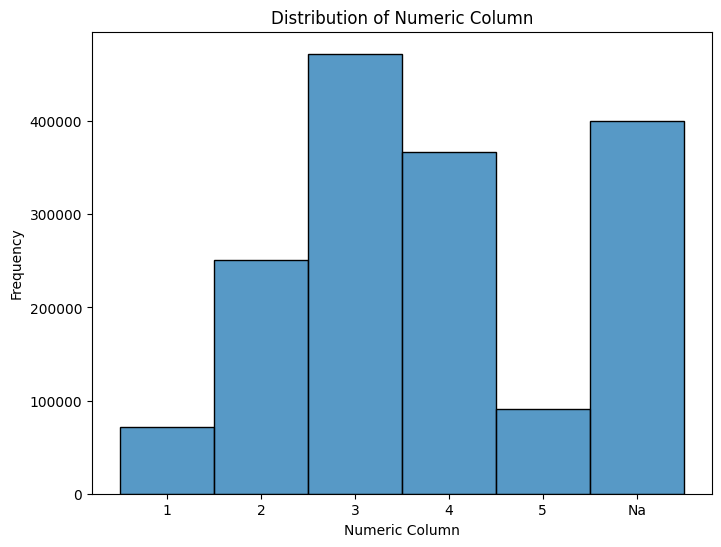

In [18]:
# Histogram of a numerical variable from our dataset

# Sorting the DataFrame by the 'Year' column in ascending order
data_sorted = data.sort_values(by='Hospital overall rating')

plt.figure(figsize=(8, 6))
sns.histplot(data_sorted['Hospital overall rating'], bins=20)
plt.xlabel('Numeric Column')
plt.ylabel('Frequency')
plt.title('Distribution of Numeric Column')
plt.show()

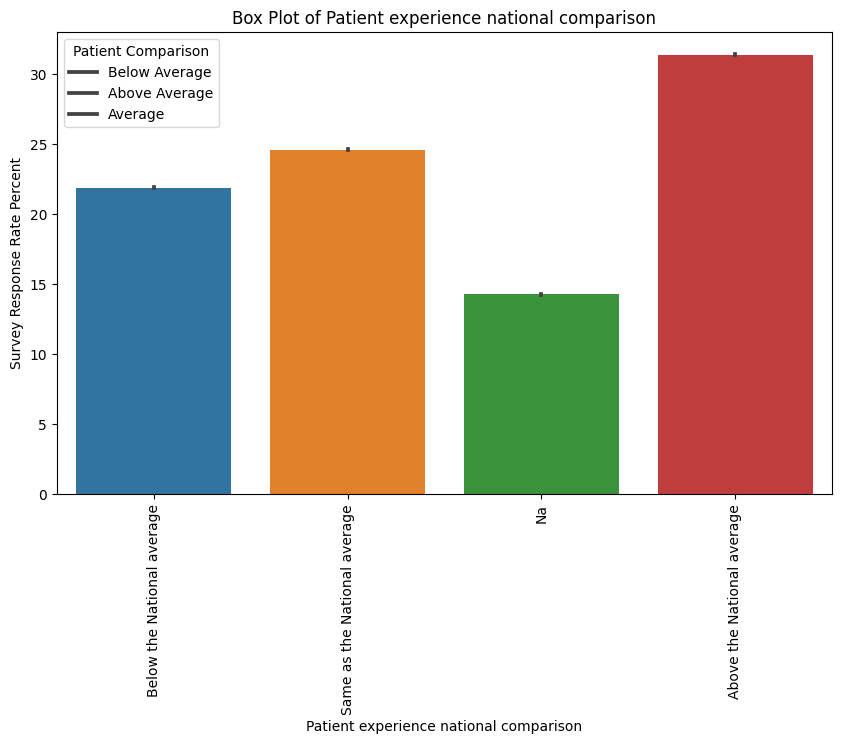

In [19]:
# Replacing 'Not Available' with a placeholder value (e.g., -1)
df['Survey Response Rate Percent'] = df['Survey Response Rate Percent'].replace('Na', -1)

# Converting the column to integers
df['Survey Response Rate Percent'] = df['Survey Response Rate Percent'].astype(int)

# Replacing the string in the specified column
df['Patient experience national comparison'] = df['Patient experience national comparison'].str.replace('Below the national average', 'Below the National average')

# Replacing the string in the specified column
df['Patient experience national comparison'] = df['Patient experience national comparison'].str.replace('Above the national average', 'Above the National average')

# Replacing the string in the specified column
df['Patient experience national comparison'] = df['Patient experience national comparison'].str.replace('Same as the national average', 'Same as the National average')

# Box plot of a numeric variable by category
plt.figure(figsize=(10, 6))
sns.barplot(data=df, y='Survey Response Rate Percent', x='Patient experience national comparison')
plt.ylabel('Survey Response Rate Percent')
plt.title('Box Plot of Patient experience national comparison')
plt.xticks(rotation=90)
# legend-like text annotation
plt.legend(title='Patient Comparison', labels=['Below Average', 'Above Average', 'Average'])
plt.show()

In [23]:
# Replacing 'Not Available' with NaN
df['Hospital overall rating'] = df['Hospital overall rating'].replace('Not Available', np.nan)

# Converting the column to numeric
df['Hospital overall rating'] = pd.to_numeric(df['Hospital overall rating'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Hospital Ownership', y='Hospital overall rating', hue='Emergency Services', palette='Set1')
plt.xlabel('Hospital Ownership')
plt.ylabel('Hospital overall rating')
plt.title('Box Plot of Hospital overall rating by Ownership and Emergency Services')
plt.xticks(rotation=90)
plt.legend(title='Emergency Services', loc='upper right')
plt.show()

TypeError: ignored

<Figure size 1000x600 with 0 Axes>

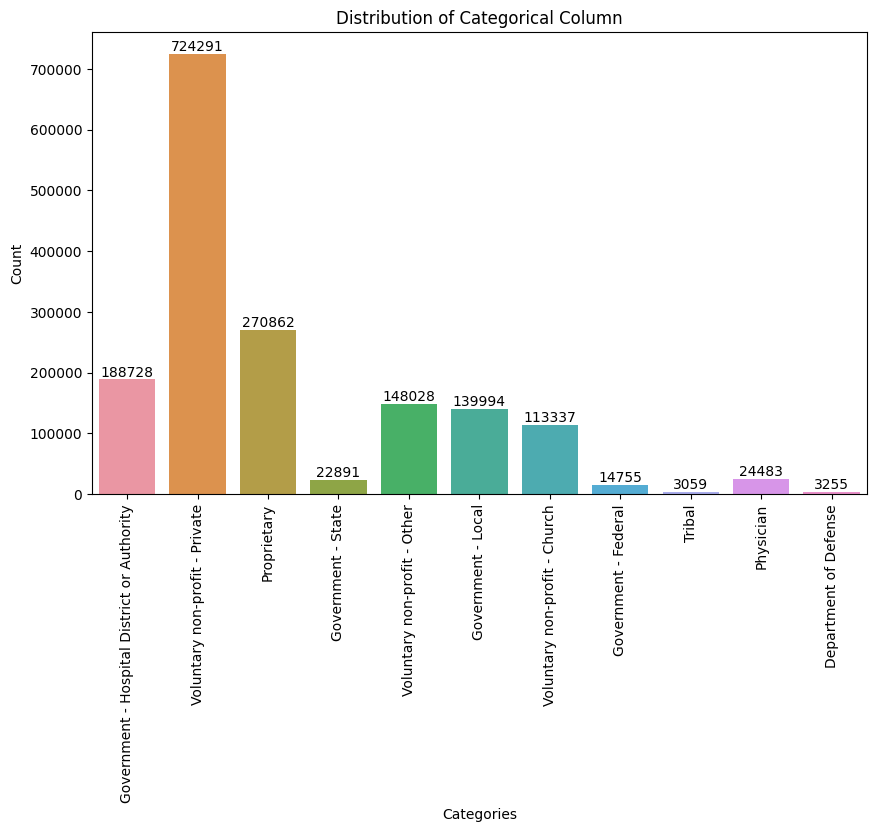

In [24]:
# Bar plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data, x='Hospital Ownership')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Distribution of Categorical Column')
plt.xticks(rotation=90)

# Annotation of each bar with its value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

In [25]:
# Categorizing 'Survey Response Rate Percent' into bins
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']
df['Response Rate Category'] = pd.cut(df['Survey Response Rate Percent'], bins=bins, labels=labels)

# The bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df, x='Response Rate Category', y='Patient Survey Star Rating', hue='Emergency Services', palette='viridis')

# bar values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Calculating the average line
average_rating = df['Patient Survey Star Rating'].mean()

# the average line
plt.axhline(average_rating, color='red', linestyle='--', label=f'Average Rating: {average_rating:.2f}')

# labels and title
plt.xlabel('Response Rate Category')
plt.ylabel('Patient Survey Star Rating')
plt.title('Bar Plot of Patient Survey Star Rating vs. Response Rate Category')
plt.legend()
plt.show()



TypeError: ignored

<Figure size 1000x600 with 0 Axes>



```
# GUIDING QUESTIONS:
1. What historical trends in patient satisfaction can be revealed through time series analysis, and how have they evolved over the years (2016-2020)?

2. How can we employ predictive modeling techniques to forecast patient satisfaction and quality measures, and what variables are most influential in these forecasts?

3. What regional variations in patient satisfaction can be identified through geospatial analysis, and how do geographical factors contribute to healthcare outcomes and patient experiences?

4. What statistical tests can we employ to assess the significance of relationships and correlations between different variables, particularly those factors that have the most significant impact on patient satisfaction?

5. Based on the analysis results, what specific recommendations can be made for healthcare policies and interventions to enhance patient satisfaction and the overall quality of healthcare services?

```

